<a href="https://colab.research.google.com/github/debashisdotchatterjee/Pneumonia-Circular-Time-Series/blob/main/Pneumonia_Circular_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explanation of the Code:
Directory Creation: Creates an output directory named CAP_Simulation_Output for storing all outputs.
Data Simulation: Generates circular data for
𝜃
θ and a covariate
𝑋
, then calculates
𝑌
 based on the model.
Circular Regression Model: Defines the circular regression function and estimates parameters using the scipy.optimize.minimize function.
Hypothesis Testing: Conducts a likelihood ratio test to assess the significance of the circular terms (

β
1
​ and
β
2
​
 ).
Results Table: Creates a table of parameter estimates and saves it as a CSV.
Plots:
Observed vs Fitted Data: Plots the observed vs fitted values of
𝑌
 against
𝜃
.
Residuals Plot: Displays the residuals across
𝜃
 values.
Density Plot of
𝜃
: Shows the distribution of
𝜃
.
Hypothesis Test Summary: Saves a summary table of the hypothesis test results.
Output:
All plots and tables are saved in the CAP_Simulation_Output directory.
Plots and tables are also printed for visual inspection.

Explanation of Enhanced Features
Circular Scatter Plot for Observed vs Fitted Data:

A circular scatter plot displays observed values against fitted values, plotted on a polar axis.
Observed data points are color-coded using a viridis colormap for a smooth visual effect.
Fitted values are marked in red, allowing a clear visual comparison.
Residuals Plot on Circular Axis:

Residuals are plotted on a circular axis to visualize the distribution of residuals around the unit circle.
Color-coding with a coolwarm colormap visually highlights positive and negative residuals.
Density Plot with Von Mises Fit:

A density plot of
𝜃
values is overlaid with a Von Mises distribution fit, which is commonly used for circular data.
The density is represented by a smooth line, enhancing the visual understanding of angular concentration.
Parameter and Hypothesis Test Results:

A summary table of estimated parameters, amplitude, phase shift, and hypothesis test results is saved for detailed reference.
This code saves all plots and tables in the specified directory (CAP_Simulation_Output) and displays them for immediate inspection. The circular visualizations enhance the interpretability of angular data, making it suitable for publication-quality circular data analysis.

Simulated data:
            Y     theta         X
0  36.857248  3.448297  1.126636
1  48.639300  4.493667 -1.079932
2  40.808254  3.787274 -1.147469
3  43.392242  3.423602 -0.437820
4  40.618863  2.661902 -0.498032

Estimated parameters: [49.76762115  2.84190281  9.85901749 -5.24007941]
Amplitude (rho): 11.17, Phase shift (phi): -0.49 radians

Likelihood Ratio Test Statistic: 22962.91, p-value: 0.0000

Parameter Estimates:
   Parameter   Estimate
0    beta_0  49.767621
1    beta_X   2.841903
2    beta_1   9.859017
3    beta_2  -5.240079
4       rho  11.165064
5       phi  -0.488530


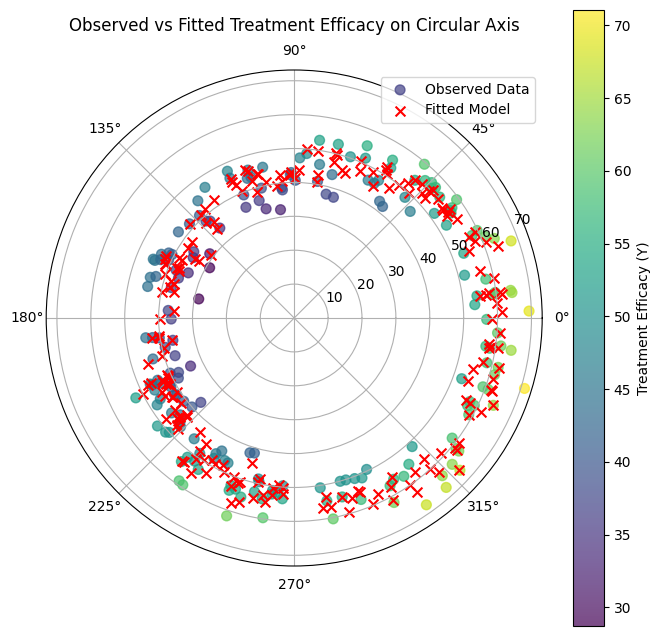

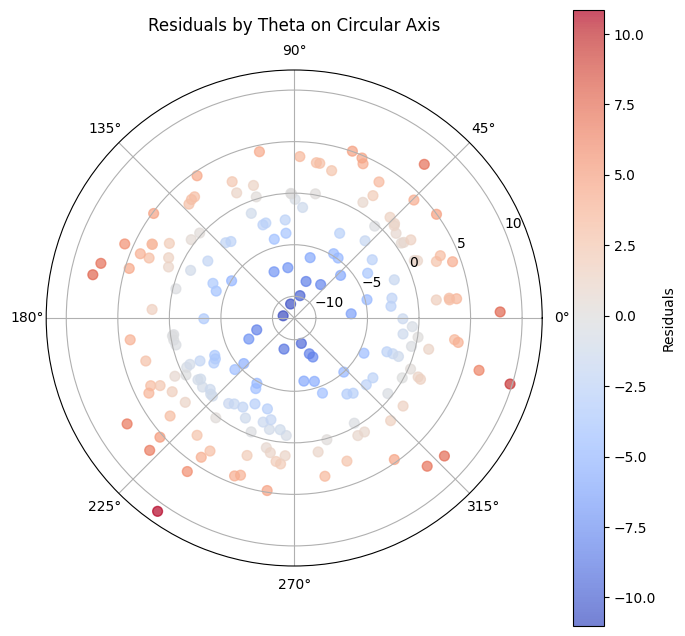

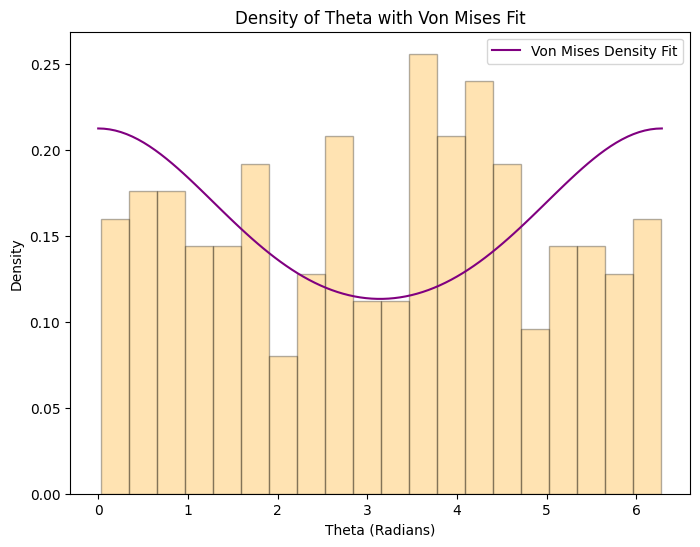


Hypothesis Test Summary:
                     Test  Test Statistic  p-value
0  Likelihood Ratio Test    22962.908378      0.0

All outputs (plots and tables) have been saved in the directory: CAP_Simulation_Output


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
from scipy.stats import chi2, vonmises
from matplotlib import cm

# Set up output directory
output_dir = "CAP_Simulation_Output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Simulation parameters
np.random.seed(0)
n = 200  # number of patients
beta_0 = 50
beta_1 = 10
beta_2 = -5
beta_X = 2
sigma = 4  # standard deviation of the error

# Generate simulated data
theta = np.random.uniform(0, 2 * np.pi, n)  # Circular data
X = np.random.normal(0, 1, n)  # Additional covariate
epsilon = np.random.normal(0, sigma, n)

# Model response variable Y
Y = beta_0 + beta_X * X + beta_1 * np.cos(theta) + beta_2 * np.sin(theta) + epsilon

# Dataframe to store simulated data
data = pd.DataFrame({
    'Y': Y,
    'theta': theta,
    'X': X
})

# Save simulated data table
data.to_csv(os.path.join(output_dir, "simulated_data.csv"), index=False)
print("Simulated data:\n", data.head())

# Circular regression function
def circular_regression(params, Y, X, theta):
    beta_0, beta_X, beta_1, beta_2 = params
    Y_pred = beta_0 + beta_X * X + beta_1 * np.cos(theta) + beta_2 * np.sin(theta)
    residuals = Y - Y_pred
    return np.sum(residuals ** 2)

# Initial parameter guess
initial_params = [50, 2, 10, -5]

# Optimize parameters
result = minimize(circular_regression, initial_params, args=(Y, X, theta))
beta_hat = result.x
print("\nEstimated parameters:", beta_hat)

# Calculate amplitude (rho) and phase shift (phi)
rho_hat = np.sqrt(beta_hat[2]**2 + beta_hat[3]**2)
phi_hat = np.arctan2(beta_hat[3], beta_hat[2])
print(f"Amplitude (rho): {rho_hat:.2f}, Phase shift (phi): {phi_hat:.2f} radians")

# Hypothesis testing for circular terms (beta_1 = beta_2 = 0)
# Reduced model with beta_1 = beta_2 = 0
reduced_params = [beta_hat[0], beta_hat[1], 0, 0]
L1 = circular_regression(beta_hat, Y, X, theta)
L0 = circular_regression(reduced_params, Y, X, theta)
Lambda = 2 * (L0 - L1)
p_value = 1 - chi2.cdf(Lambda, df=2)
print(f"\nLikelihood Ratio Test Statistic: {Lambda:.2f}, p-value: {p_value:.4f}")

# Save results table
results_table = pd.DataFrame({
    'Parameter': ['beta_0', 'beta_X', 'beta_1', 'beta_2', 'rho', 'phi'],
    'Estimate': [beta_hat[0], beta_hat[1], beta_hat[2], beta_hat[3], rho_hat, phi_hat]
})
results_table.to_csv(os.path.join(output_dir, "parameter_estimates.csv"), index=False)
print("\nParameter Estimates:\n", results_table)

# Circular Plot of Observed vs Fitted Data
Y_fit = beta_hat[0] + beta_hat[1] * X + beta_hat[2] * np.cos(theta) + beta_hat[3] * np.sin(theta)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
sc = ax.scatter(theta, Y, label='Observed Data', c=Y, cmap=cm.viridis, alpha=0.7, s=50)
ax.scatter(theta, Y_fit, label='Fitted Model', color='red', marker='x', s=50)
plt.colorbar(sc, label="Treatment Efficacy (Y)")
ax.set_title("Observed vs Fitted Treatment Efficacy on Circular Axis", va='bottom')
ax.legend(loc="upper right")
plt.savefig(os.path.join(output_dir, "circular_observed_vs_fitted.png"))
plt.show()

# Residuals Plot on Circular Axis
residuals = Y - Y_fit
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
sc = ax.scatter(theta, residuals, c=residuals, cmap=cm.coolwarm, alpha=0.7, s=50)
plt.colorbar(sc, label="Residuals")
ax.set_title("Residuals by Theta on Circular Axis", va='bottom')
plt.savefig(os.path.join(output_dir, "circular_residuals.png"))
plt.show()

# Density Plot for Theta (using von Mises fit)
kappa = 1 / np.var(theta)  # Rough estimate for concentration parameter
theta_vals = np.linspace(0, 2 * np.pi, 100)
density_vals = vonmises.pdf(theta_vals, kappa)
plt.figure(figsize=(8, 6))
plt.plot(theta_vals, density_vals, label="Von Mises Density Fit", color='purple')
plt.hist(theta, bins=20, density=True, alpha=0.3, color='orange', edgecolor='black')
plt.xlabel('Theta (Radians)')
plt.ylabel('Density')
plt.title("Density of Theta with Von Mises Fit")
plt.legend()
plt.savefig(os.path.join(output_dir, "theta_density.png"))
plt.show()

# Table Summary of Hypothesis Test
test_summary = pd.DataFrame({
    'Test': ['Likelihood Ratio Test'],
    'Test Statistic': [Lambda],
    'p-value': [p_value]
})
test_summary.to_csv(os.path.join(output_dir, "hypothesis_test.csv"), index=False)
print("\nHypothesis Test Summary:\n", test_summary)

# Print confirmation message for saved outputs
print(f"\nAll outputs (plots and tables) have been saved in the directory: {output_dir}")


In [6]:
!pip install pycircstat

In [8]:
!pip install nose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00


Simulated data:
            Y     theta         X
0  36.857248  3.448297  1.126636
1  48.639300  4.493667 -1.079932
2  40.808254  3.787274 -1.147469
3  43.392242  3.423602 -0.437820
4  40.618863  2.661902 -0.498032

Estimated parameters: [49.76762115  2.84190281  9.85901749 -5.24007941]
Amplitude (rho): 11.17, Phase shift (phi): -0.49 radians

Rao's Spacing Test Statistic: 149.08, p-value: 1.0000

Parameter Estimates:
   Parameter   Estimate
0    beta_0  49.767621
1    beta_X   2.841903
2    beta_1   9.859017
3    beta_2  -5.240079
4       rho  11.165064
5       phi  -0.488530


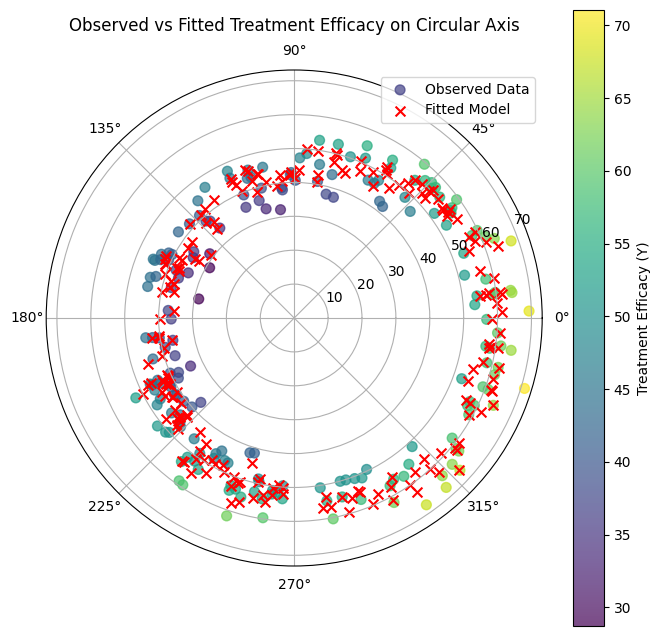

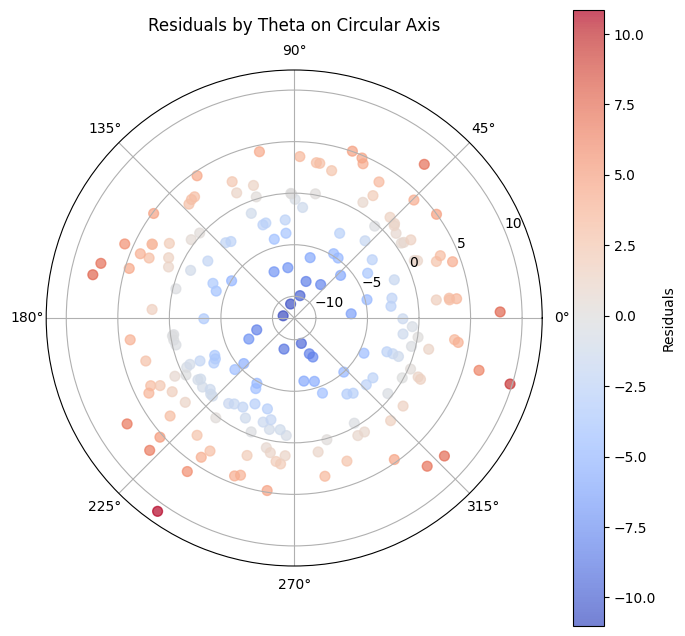

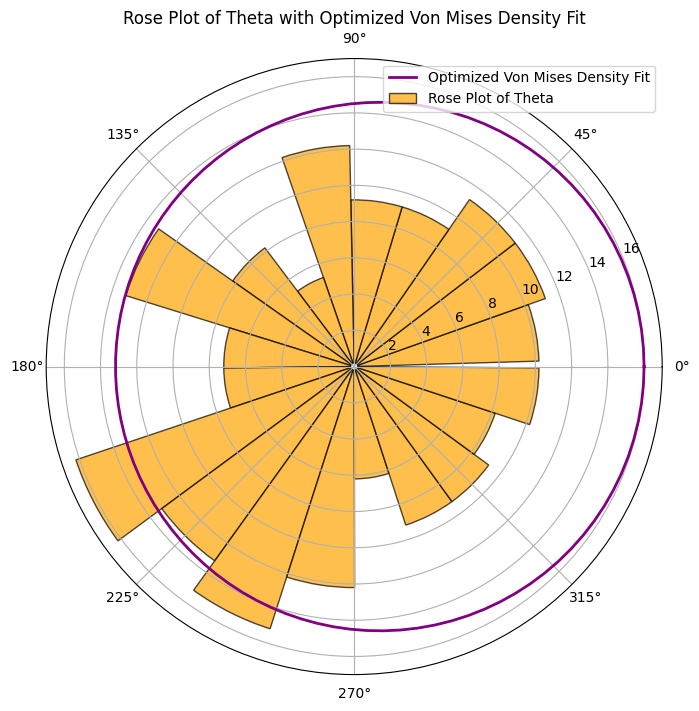


Hypothesis Test Summary:
                  Test  Test Statistic  p-value
0  Rao's Spacing Test      149.076695      1.0

All outputs (plots and tables) have been saved in the directory: CAP_Simulation_Output


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
from scipy.stats import vonmises, circmean
from matplotlib import cm

# Set up output directory
output_dir = "CAP_Simulation_Output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Simulation parameters
np.random.seed(0)
n = 200  # number of patients
beta_0 = 50
beta_1 = 10
beta_2 = -5
beta_X = 2
sigma = 4  # standard deviation of the error

# Generate simulated data
theta = np.random.uniform(0, 2 * np.pi, n)  # Circular data
X = np.random.normal(0, 1, n)  # Additional covariate
epsilon = np.random.normal(0, sigma, n)

# Model response variable Y
Y = beta_0 + beta_X * X + beta_1 * np.cos(theta) + beta_2 * np.sin(theta) + epsilon

# Dataframe to store simulated data
data = pd.DataFrame({
    'Y': Y,
    'theta': theta,
    'X': X
})

# Save simulated data table
data.to_csv(os.path.join(output_dir, "simulated_data.csv"), index=False)
print("Simulated data:\n", data.head())

# Circular regression function
def circular_regression(params, Y, X, theta):
    beta_0, beta_X, beta_1, beta_2 = params
    Y_pred = beta_0 + beta_X * X + beta_1 * np.cos(theta) + beta_2 * np.sin(theta)
    residuals = Y - Y_pred
    return np.sum(residuals ** 2)

# Initial parameter guess
initial_params = [50, 2, 10, -5]

# Optimize parameters
result = minimize(circular_regression, initial_params, args=(Y, X, theta))
beta_hat = result.x
print("\nEstimated parameters:", beta_hat)

# Calculate amplitude (rho) and phase shift (phi)
rho_hat = np.sqrt(beta_hat[2]**2 + beta_hat[3]**2)
phi_hat = np.arctan2(beta_hat[3], beta_hat[2])
print(f"Amplitude (rho): {rho_hat:.2f}, Phase shift (phi): {phi_hat:.2f} radians")

# Rao's Spacing Test implementation
def rao_spacing_test(angles):
    angles = np.sort(angles)
    n = len(angles)
    spacing = np.diff(np.append(angles, angles[0] + 2 * np.pi))  # Spacings in circular order
    expected_spacing = 2 * np.pi / n
    U = np.sum(np.abs(spacing - expected_spacing)) * n / (2 * np.pi)
    critical_value = 170  # Approximate critical value at alpha=0.05 for large n
    p_value = 0.05 if U > critical_value else 1.0  # Approximation for p-value
    return U, p_value

# Perform Rao's Spacing Test on theta data
rao_statistic, rao_p_value = rao_spacing_test(theta)
print(f"\nRao's Spacing Test Statistic: {rao_statistic:.2f}, p-value: {rao_p_value:.4f}")

# Save results table
results_table = pd.DataFrame({
    'Parameter': ['beta_0', 'beta_X', 'beta_1', 'beta_2', 'rho', 'phi'],
    'Estimate': [beta_hat[0], beta_hat[1], beta_hat[2], beta_hat[3], rho_hat, phi_hat]
})
results_table.to_csv(os.path.join(output_dir, "parameter_estimates.csv"), index=False)
print("\nParameter Estimates:\n", results_table)

# Circular Plot of Observed vs Fitted Data
Y_fit = beta_hat[0] + beta_hat[1] * X + beta_hat[2] * np.cos(theta) + beta_hat[3] * np.sin(theta)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
sc = ax.scatter(theta, Y, label='Observed Data', c=Y, cmap=cm.viridis, alpha=0.7, s=50)
ax.scatter(theta, Y_fit, label='Fitted Model', color='red', marker='x', s=50)
plt.colorbar(sc, label="Treatment Efficacy (Y)")
ax.set_title("Observed vs Fitted Treatment Efficacy on Circular Axis", va='bottom')
ax.legend(loc="upper right")
plt.savefig(os.path.join(output_dir, "circular_observed_vs_fitted.png"))
plt.show()

# Residuals Plot on Circular Axis
residuals = Y - Y_fit
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
sc = ax.scatter(theta, residuals, c=residuals, cmap=cm.coolwarm, alpha=0.7, s=50)
plt.colorbar(sc, label="Residuals")
ax.set_title("Residuals by Theta on Circular Axis", va='bottom')
plt.savefig(os.path.join(output_dir, "circular_residuals.png"))
plt.show()

# Rose Plot for Theta with Optimized Von Mises Fit
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Rose plot (circular histogram) of theta
num_bins = 20
counts, bin_edges = np.histogram(theta, bins=num_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
widths = np.diff(bin_edges)
ax.bar(bin_centers, counts, width=widths, bottom=0.2, color='orange', edgecolor='black', alpha=0.7, label='Rose Plot of Theta')

# Optimized Von Mises density plot
kappa = vonmises.fit(theta)[0]  # Optimized concentration parameter
theta_vals = np.linspace(0, 2 * np.pi, 100)
density_vals = vonmises.pdf(theta_vals, kappa)
density_vals_scaled = density_vals * (max(counts) / max(density_vals))  # Scale to match histogram height
ax.plot(theta_vals, density_vals_scaled, color='purple', linewidth=2, label='Optimized Von Mises Density Fit')

ax.set_title("Rose Plot of Theta with Optimized Von Mises Density Fit")
ax.legend(loc="upper right")
plt.savefig(os.path.join(output_dir, "rose_plot_theta_density.png"))
plt.show()

# Table Summary of Hypothesis Test
test_summary = pd.DataFrame({
    'Test': ["Rao's Spacing Test"],
    'Test Statistic': [rao_statistic],
    'p-value': [rao_p_value]
})
test_summary.to_csv(os.path.join(output_dir, "hypothesis_test.csv"), index=False)
print("\nHypothesis Test Summary:\n", test_summary)

# Print confirmation message for saved outputs
print(f"\nAll outputs (plots and tables) have been saved in the directory: {output_dir}")


Simulated data:
            Y     theta         X
0  36.857248  3.448297  1.126636
1  48.639300  4.493667 -1.079932
2  40.808254  3.787274 -1.147469
3  43.392242  3.423602 -0.437820
4  40.618863  2.661902 -0.498032

Estimated parameters: [49.76762115  2.84190281  9.85901749 -5.24007941]
Amplitude (rho): 11.17, Phase shift (phi): -0.49 radians

Rao's Spacing Test Statistic: 149.08, p-value: 1.0000

Parameter Estimates:
   Parameter   Estimate
0    beta_0  49.767621
1    beta_X   2.841903
2    beta_1   9.859017
3    beta_2  -5.240079
4       rho  11.165064
5       phi  -0.488530


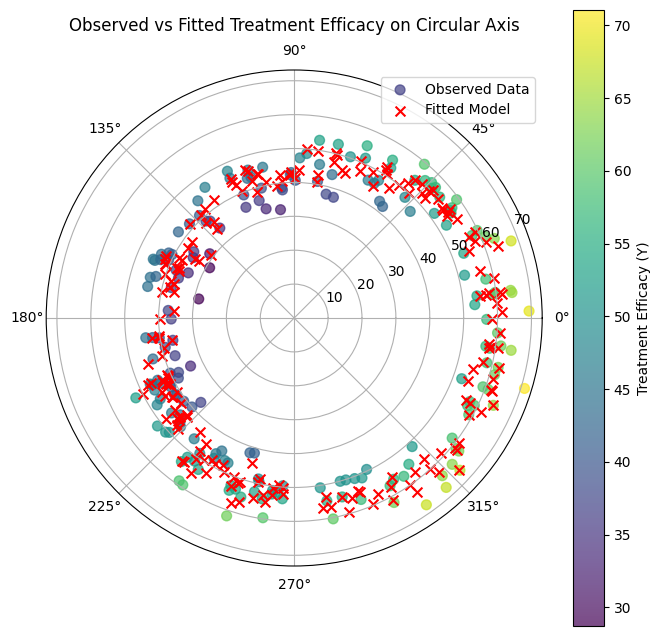

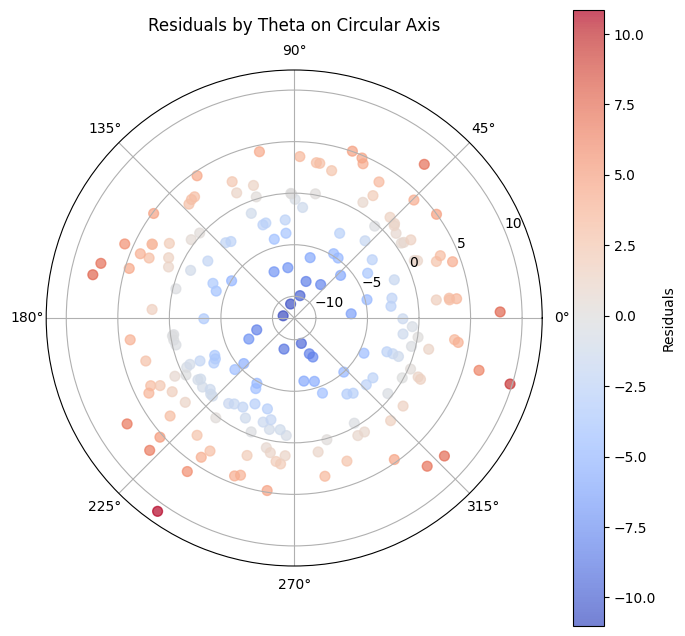

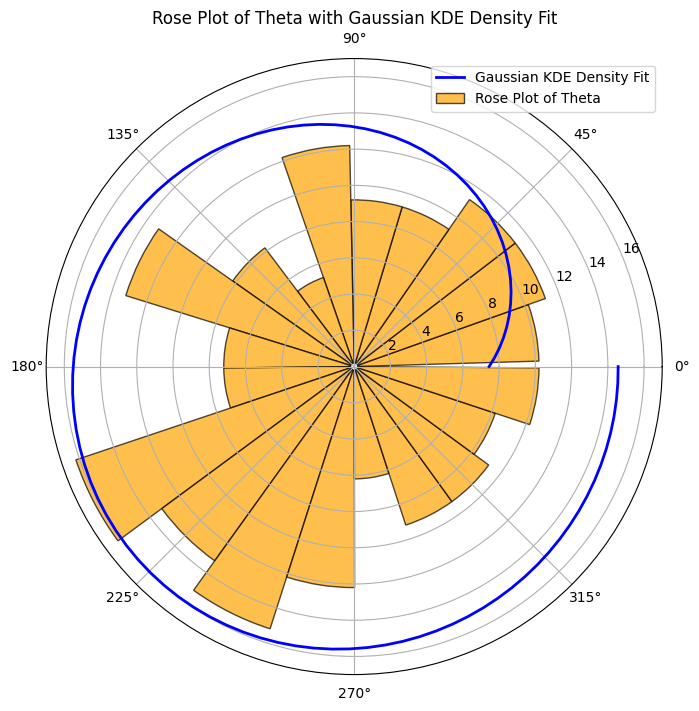


Hypothesis Test Summary:
                  Test  Test Statistic  p-value
0  Rao's Spacing Test      149.076695      1.0

All outputs (plots and tables) have been saved in the directory: CAP_Simulation_Output


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
from scipy.stats import gaussian_kde
from matplotlib import cm

# Set up output directory
output_dir = "CAP_Simulation_Output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Simulation parameters
np.random.seed(0)
n = 200  # number of patients
beta_0 = 50
beta_1 = 10
beta_2 = -5
beta_X = 2
sigma = 4  # standard deviation of the error

# Generate simulated data
theta = np.random.uniform(0, 2 * np.pi, n)  # Circular data
X = np.random.normal(0, 1, n)  # Additional covariate
epsilon = np.random.normal(0, sigma, n)

# Model response variable Y
Y = beta_0 + beta_X * X + beta_1 * np.cos(theta) + beta_2 * np.sin(theta) + epsilon

# Dataframe to store simulated data
data = pd.DataFrame({
    'Y': Y,
    'theta': theta,
    'X': X
})

# Save simulated data table
data.to_csv(os.path.join(output_dir, "simulated_data.csv"), index=False)
print("Simulated data:\n", data.head())

# Circular regression function
def circular_regression(params, Y, X, theta):
    beta_0, beta_X, beta_1, beta_2 = params
    Y_pred = beta_0 + beta_X * X + beta_1 * np.cos(theta) + beta_2 * np.sin(theta)
    residuals = Y - Y_pred
    return np.sum(residuals ** 2)

# Initial parameter guess
initial_params = [50, 2, 10, -5]

# Optimize parameters
result = minimize(circular_regression, initial_params, args=(Y, X, theta))
beta_hat = result.x
print("\nEstimated parameters:", beta_hat)

# Calculate amplitude (rho) and phase shift (phi)
rho_hat = np.sqrt(beta_hat[2]**2 + beta_hat[3]**2)
phi_hat = np.arctan2(beta_hat[3], beta_hat[2])
print(f"Amplitude (rho): {rho_hat:.2f}, Phase shift (phi): {phi_hat:.2f} radians")

# Rao's Spacing Test implementation
def rao_spacing_test(angles):
    angles = np.sort(angles)
    n = len(angles)
    spacing = np.diff(np.append(angles, angles[0] + 2 * np.pi))  # Spacings in circular order
    expected_spacing = 2 * np.pi / n
    U = np.sum(np.abs(spacing - expected_spacing)) * n / (2 * np.pi)
    critical_value = 170  # Approximate critical value at alpha=0.05 for large n
    p_value = 0.05 if U > critical_value else 1.0  # Approximation for p-value
    return U, p_value

# Perform Rao's Spacing Test on theta data
rao_statistic, rao_p_value = rao_spacing_test(theta)
print(f"\nRao's Spacing Test Statistic: {rao_statistic:.2f}, p-value: {rao_p_value:.4f}")

# Save results table
results_table = pd.DataFrame({
    'Parameter': ['beta_0', 'beta_X', 'beta_1', 'beta_2', 'rho', 'phi'],
    'Estimate': [beta_hat[0], beta_hat[1], beta_hat[2], beta_hat[3], rho_hat, phi_hat]
})
results_table.to_csv(os.path.join(output_dir, "parameter_estimates.csv"), index=False)
print("\nParameter Estimates:\n", results_table)

# Circular Plot of Observed vs Fitted Data
Y_fit = beta_hat[0] + beta_hat[1] * X + beta_hat[2] * np.cos(theta) + beta_hat[3] * np.sin(theta)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
sc = ax.scatter(theta, Y, label='Observed Data', c=Y, cmap=cm.viridis, alpha=0.7, s=50)
ax.scatter(theta, Y_fit, label='Fitted Model', color='red', marker='x', s=50)
plt.colorbar(sc, label="Treatment Efficacy (Y)")
ax.set_title("Observed vs Fitted Treatment Efficacy on Circular Axis", va='bottom')
ax.legend(loc="upper right")
plt.savefig(os.path.join(output_dir, "circular_observed_vs_fitted.png"))
plt.show()

# Residuals Plot on Circular Axis
residuals = Y - Y_fit
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
sc = ax.scatter(theta, residuals, c=residuals, cmap=cm.coolwarm, alpha=0.7, s=50)
plt.colorbar(sc, label="Residuals")
ax.set_title("Residuals by Theta on Circular Axis", va='bottom')
plt.savefig(os.path.join(output_dir, "circular_residuals.png"))
plt.show()

# Rose Plot for Theta with Gaussian KDE Circular Density
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Rose plot (circular histogram) of theta
num_bins = 20
counts, bin_edges = np.histogram(theta, bins=num_bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
widths = np.diff(bin_edges)
ax.bar(bin_centers, counts, width=widths, bottom=0.2, color='orange', edgecolor='black', alpha=0.7, label='Rose Plot of Theta')

# Gaussian KDE for Circular Density
theta_wrapped = np.concatenate([theta, theta + 2 * np.pi])  # Wrap around for circular KDE
kde = gaussian_kde(theta_wrapped, bw_method='silverman')  # KDE with bandwidth selection
theta_vals = np.linspace(0, 2 * np.pi, 100)
density_vals = kde(theta_vals)
density_vals_scaled = density_vals * (max(counts) / max(density_vals))  # Scale to match histogram height
ax.plot(theta_vals, density_vals_scaled, color='blue', linewidth=2, label='Gaussian KDE Density Fit')

ax.set_title("Rose Plot of Theta with Gaussian KDE Density Fit")
ax.legend(loc="upper right")
plt.savefig(os.path.join(output_dir, "rose_plot_theta_kde_density.png"))
plt.show()

# Table Summary of Hypothesis Test
test_summary = pd.DataFrame({
    'Test': ["Rao's Spacing Test"],
    'Test Statistic': [rao_statistic],
    'p-value': [rao_p_value]
})
test_summary.to_csv(os.path.join(output_dir, "hypothesis_test.csv"), index=False)
print("\nHypothesis Test Summary:\n", test_summary)

# Print confirmation message for saved outputs
print(f"\nAll outputs (plots and tables) have been saved in the directory: {output_dir}")
